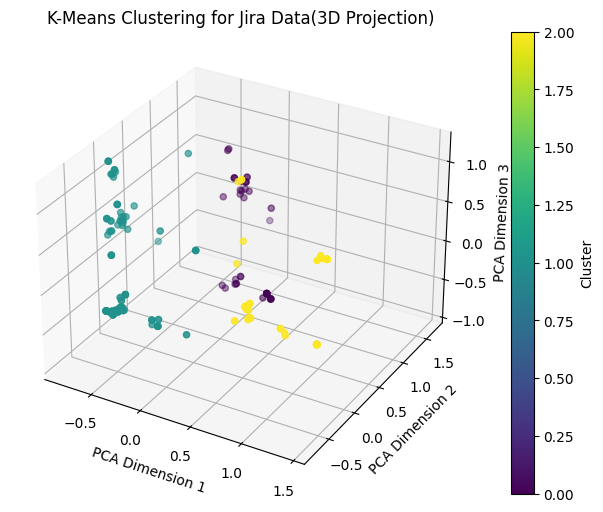

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting

# Read data from Excel file
df = pd.read_csv('modified_new.csv')

# Select relevant columns for clustering
X = df[['Test Type', 'Feature Type', 'Defect Type', 'Modified Summary']]

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X, columns=['Test Type', 'Feature Type', 'Defect Type', 'Modified Summary'])

# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(X_encoded)

# Reduce dimensionality using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_encoded)

# Create a 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='viridis')

# Set labels
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')

# Add color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Cluster')

plt.title('K-Means Clustering for Jira Data(3D Projection)')
plt.show()


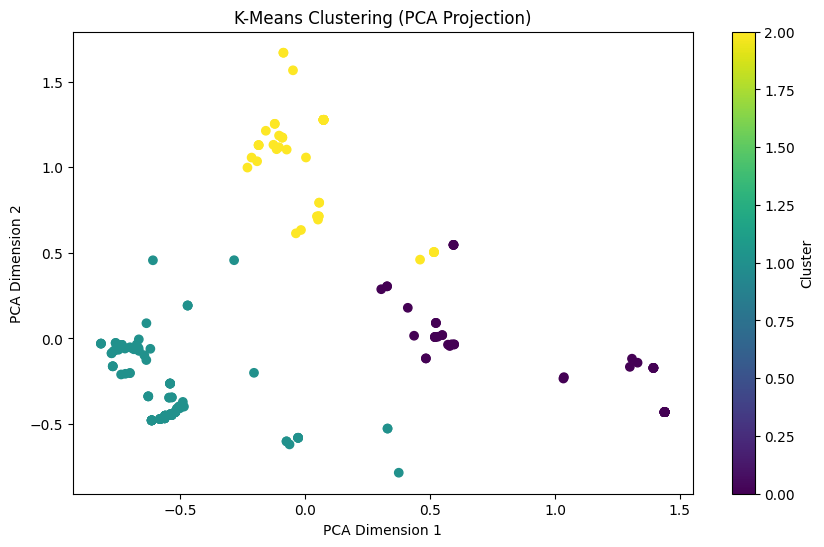

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the data from your CSV file
df = pd.read_csv('modified_new.csv', usecols=['Test Type', 'Feature Type', 'Defect Type', 'Modified Summary'])

# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(df, columns=['Test Type', 'Feature Type', 'Defect Type', 'Modified Summary'])

# Choose the number of clusters for k-means clustering
num_clusters = 3  # You can adjust this based on your data

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(X_encoded)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


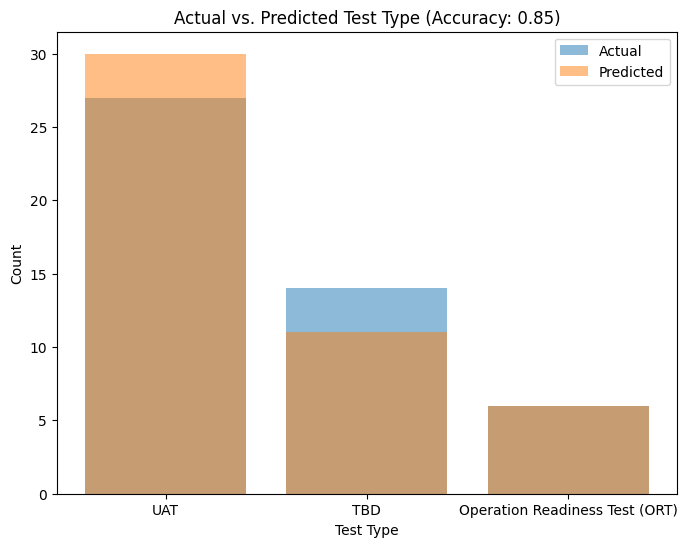

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read data from Excel file
df = pd.read_csv('modified_new.csv')

# Define the features (X) and target (y)
X = df[['Feature Type', 'Defect Type', 'Modified Summary']]
y = df['Test Type']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=['Feature Type', 'Defect Type', 'Modified Summary'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a classification model (Random Forest, for example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(y_test.value_counts().index, y_test.value_counts().values, label='Actual', alpha=0.5)
plt.bar(y_test.value_counts().index, pd.Series(y_pred).value_counts().reindex(y_test.value_counts().index, fill_value=0).values, label='Predicted', alpha=0.5)
plt.xlabel('Test Type')
plt.ylabel('Count')
plt.title(f'Actual vs. Predicted Test Type (Accuracy: {accuracy:.2f})')
plt.legend()
plt.show()
